In [2]:
import numpy as np
import pandas as pd

# Задача № 18

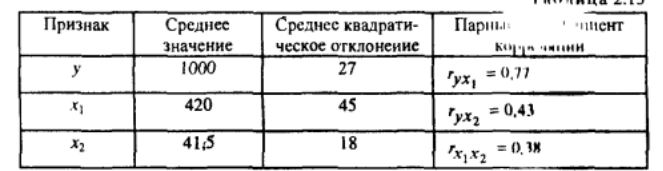

1)  Построить уравнение множ-ой лин регрессии в стандартном и натуральном масштабе

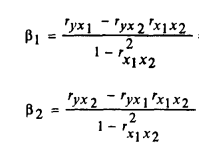

In [2]:
r_y_x1 = 0.77
r_y_x2 = 0.43
r_x1_x2 = 0.38

In [3]:
beta_1 = (r_y_x1 - r_y_x2*r_x1_x2)/(1 - r_x1_x2**2)
beta_2 = (r_y_x2 - r_y_x1*r_x1_x2)/(1 - r_x1_x2**2)
print(f" beta_1 : {beta_1: .3f}")
print(f" beta_2 : {beta_2: .3f}")

 beta_1 :  0.709
 beta_2 :  0.161


Уравнение в стандартизованном масштабе: $t_y = 0.709 \cdot t_{x1} + 0.161 \cdot t_{x2}$

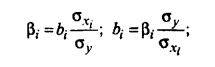

In [4]:
sigma_y = 27
sigma_x1 = 45
sigma_x2 = 18
b1 = (beta_1 * sigma_y)/ sigma_x1
b2 = (beta_2 * sigma_y)/ sigma_x2
print(f" b1 : {b1: .3f}")
print(f" b2 : {b2: .3f}")


 b1 :  0.425
 b2 :  0.241


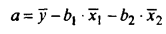

In [5]:
y_mean = 1000
x1_mean = 420 
x2_mean = 41.5
b0 = y_mean - b1 * x1_mean - b2 * x2_mean
print(f" b0 : {b0: .3f}")

 b0 :  811.341


Уравнение в натуральном масштабе: $y = 811.341 + 0.425x_1 + 0.241x_2$

2) Определите показатели частной и множественной корреляции

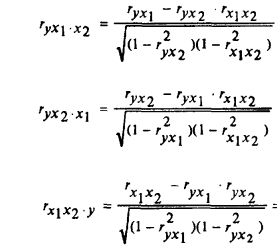

In [6]:

# Показатели частной корреляции:
r_y_x1_x2 = (r_y_x1 - r_y_x2*r_x1_x2) / np.sqrt((1 - r_y_x2**2)*(1 - r_x1_x2**2))
r_y_x2_x1 = (r_y_x2 - r_y_x1*r_x1_x2) / np.sqrt((1 - r_y_x1**2)*(1 - r_x1_x2**2))
r_x1_x2_y = (r_x1_x2 - r_y_x1*r_y_x2) / np.sqrt((1 - r_y_x1**2)*(1 - r_y_x2**2))
print(f" r_y_x1_x2 : {r_y_x1_x2: .3f}")
print(f" r_y_x2_x : {r_y_x2_x1: .3f}")
print(f" r_x1_x2_y : {r_x1_x2_y: .3f}")

 r_y_x1_x2 :  0.726
 r_y_x2_x :  0.233
 r_x1_x2_y :  0.085


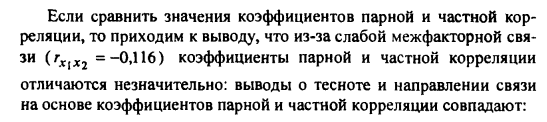

Если коротко:\
связь между y и x1 сильная (как парный коэф, так и частный)\
связь между y и x2 в случае парной корреляции слабая, в случае частной - очень слабая\
связь между x1 и x2 в случае парной корреляции слабая, а в случае частной корреляции практически отсутствует (?)

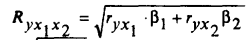

In [7]:
R_yx1x2 = np.sqrt(r_y_x1 * beta_1 + r_y_x2 * beta_2)
print(f" R_yx1x2 : {R_yx1x2: .3f}")

 R_yx1x2 :  0.784


Зависимость y от x1 и x2 характеризуется, как тесная, в которой 78% вариации потребления электроэнергии\
определяются вариацией производства продукции и уровнем механизации труда

3) Найти частные коэффициенты эластичности и сравнить их с $\beta$-коэффициентами

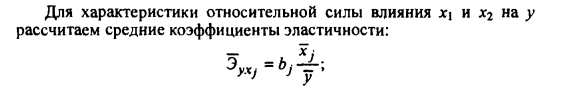

In [8]:
E_y_x1 = b1 * x1_mean / y_mean
E_y_x2 = b2 * x2_mean / y_mean
print(f" E_y_x1: {E_y_x1:.3f}")
print(f" E_y_x2: {E_y_x2:.3f}")

 E_y_x1: 0.179
 E_y_x2: 0.010


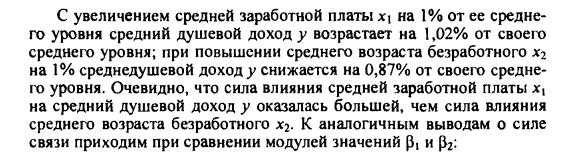

С увеличением производства продукции x1 на 1% от своего среднего уровня потребление электроэнергии возрастает на 0.18%;\
При повышении уровня механизации труда x2 на 1% от своего среднего уровня потребление электроэнергии повышается на 0.01%\
К аналогичным выводам о силе связи приходим при сравнении модулей $\beta_1$ и $\beta_2$\
$|{\beta_1}|  (= 0.709) > |{\beta_2}|  (= 0.161)$

4) Расчитать общий и частный F-критерии Фишера

Общий F-критерий проверяет гипотезу H0 о статистической значимости уравнения и показателя тесноты связи

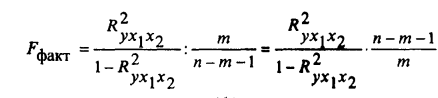

In [9]:
n = 30
m = 2
F_fact = (R_yx1x2**2/(1 - R_yx1x2**2))*((n - m - 2)/m)
print(f" F_fact : {F_fact: .3f}")

 F_fact :  20.763


In [10]:
from scipy.stats import *
F = f(1, n-2)
alpha = 0.05
f_tabl = F.isf(alpha)
f_tabl

4.195971818557765

С доверительной вероятностью 0.95 можно утвержать, что уравнение регрессии и коэффициент множественной корреляции являются статистически значимыми.

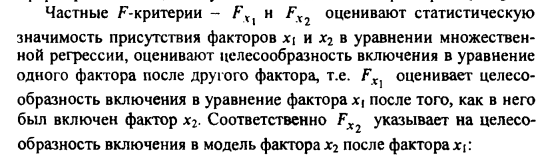

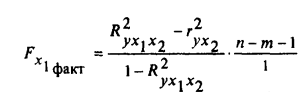




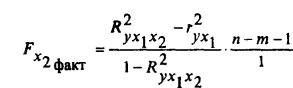

In [11]:
F_x1 = (R_yx1x2**2 - r_y_x2**2)/(1 - R_yx1x2**2) * (n - m - 1)
F_x2 = (R_yx1x2**2 - r_y_x1**2)/(1 - R_yx1x2**2) * (n - m - 1)
print(f" F_x1:{F_x1: .3f}")
print(f" F_x2:{F_x2: .3f}")

 F_x1: 30.158
 F_x2: 1.547


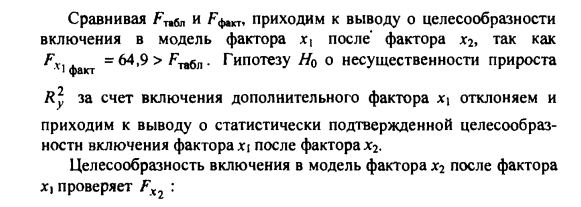

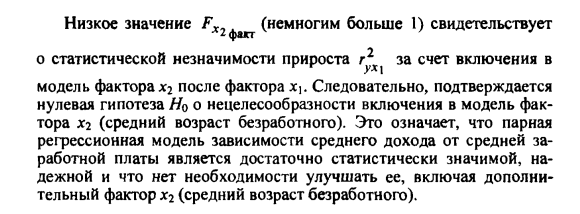

# Задача 6

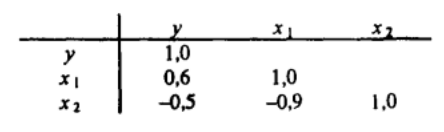

y - урожайность зерна
x1 - количество осадков
x2 - средняя температура воздуха

1) Определить частные коэффициенты корреляции результата с каждым из факторов.\
Прокомментировать различие парных и частных коэффициентов

In [12]:
r_y_x1 = 0.6
r_y_x2 = -0.5
r_x1_x2 = -0.9
# Показатели частной корреляции:
r_y_x1_x2 = (r_y_x1 - r_y_x2*r_x1_x2) / np.sqrt((1 - r_y_x2**2)*(1 - r_x1_x2**2))
r_y_x2_x1 = (r_y_x2 - r_y_x1*r_x1_x2) / np.sqrt((1 - r_y_x1**2)*(1 - r_x1_x2**2))
r_x1_x2_y = (r_x1_x2 - r_y_x1*r_y_x2) / np.sqrt((1 - r_y_x1**2)*(1 - r_y_x2**2))
print(f" r_y_x1_x2 : {r_y_x1_x2: .3f}")
print(f" r_y_x2_x1 : {r_y_x2_x1: .3f}")
print(f" r_x1_x2_y : {r_x1_x2_y: .3f}")

 r_y_x1_x2 :  0.397
 r_y_x2_x1 :  0.115
 r_x1_x2_y : -0.866


Чисто для себя (потом удали)

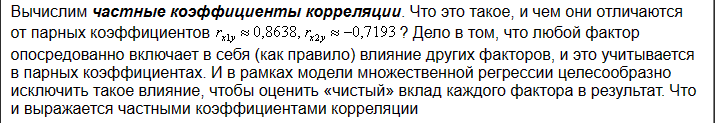


Между признаками x1 и x2 наблюдается очень сильная обратная связь. 

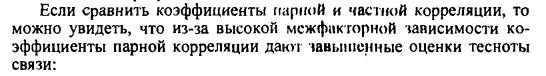

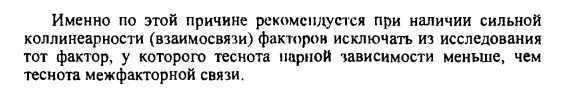

В нашем случае:  r_y_x1 = 0.6, а r_y_x1_x2 = 0.397 (наблюдаем ослабление тесноты связи);\
r_y_x2 = -0.5, а r_y_x2_x1 = 0.115 (наблюдаем смену направления и значительное ослабление тесноты связи)

2) Определить, по каким признакам лучше строить уравнение регрессии\
Оценим частные коэффициенты корреляции. Наиболее тесно связаны y и x1 r_y_x1_x2 = 0.397, в то время как r_y_x2_x1 = 0.115.\
Также заметим, что "очищение" признака x2 от влияния признака x1 влечет за собой смену направления, а также значительное ослабление тесноты связи. Из этого следует, что имеет смысл исключить признак x2 из уравнения регрессии

# Найти инфу

3) Построить уравнение регрессии в стандартизованном масштабе

$\begin {cases}
r_{yx1} = \beta_1 + \beta_2 \cdot r_{x2x1}\\
r_{yx2} = \beta_1 \cdot r_{x2x1} + \beta_2
\end {cases}
$

In [13]:
import sympy as sp
beta_1, beta_2 = sp.symbols('beta_1, beta_2')
sp.solve([r_y_x1 - beta_1 - beta_2 * r_x1_x2, r_y_x2 - beta_1 * r_x1_x2 - beta_2], [beta_1, beta_2], dict = True)[0]

{beta_1: 0.789473684210526, beta_2: 0.210526315789474}

In [14]:
beta_1 = 0.89
beta_2 = 0.211

$t_y = 0.89 \cdot t_{x1} + 0.211 \cdot t_{x2}$

In [15]:
# вопрос, как отсюда найти b0 (a), если мы не знаем ни данных, ни средних значений

# Задача № 7 аналогична задаче № 6 => вопросы по ней такие же

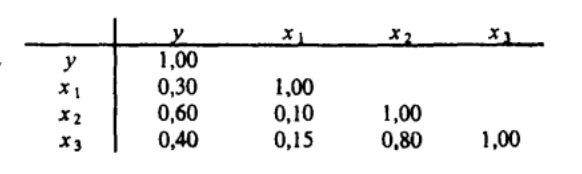

1) Построить уравнение регрессии в стандартизованном виде и сделать выводы

In [37]:
r_y_x1 = 0.3
r_y_x2 = 0.6
r_y_x3 = 0.4
r_x1_x2 = 0.1
r_x1_x3 = 0.15
r_x2_x3 = 0.8

$\begin {cases}
r_{yx1} = \beta_1 + \beta_2 \cdot r_{x2x1} + \beta_3 \cdot r_{x1x3}\\
r_{yx2} = \beta_1 \cdot r_{x2x1} + \beta_2 + \beta_3 \cdot r_{x2x3}\\
r_{yx3} = \beta_1 \cdot r_{x3x1} + \beta_2 \cdot r_{x2x3} + \beta_3
\end {cases}
$

In [38]:
beta_1, beta_2, beta_3 = sp.symbols('beta_1, beta_2, beta_3')
sp.solve([r_y_x1 - beta_1 - beta_2 * r_x1_x2 - beta_3 * r_x1_x3, 
          r_y_x2 - beta_1 * r_x1_x2 - beta_2 - beta_3 * r_x2_x3,
         r_y_x3 - beta_1 * r_x1_x3 - beta_2 * r_x2_x3 - beta_3], [beta_1, beta_2, beta_3], dict = True)[0]

{beta_1: 0.261735419630156,
 beta_2: 0.792318634423898,
 beta_3: -0.273115220483642}

In [39]:
beta_1 = 0.262
beta_2 = 0.792
beta_3 = -0.273

$t_y = 0.262 \cdot t_{x1} + 0.792 \cdot t_{x2} - 0.273 \cdot t_{x3}$

2) Определите показатель множественной корреляции (нескорректированный и скорректированный)

In [87]:
R_m = np.array([[1, 0.1, 0.15, 0.3], [0.1, 1, 0.8, 0.6], [0.15, 0.8, 1, 0.4], [0.3, 0.6, 0.4, 1]])
R_m

array([[1.  , 0.1 , 0.15, 0.3 ],
       [0.1 , 1.  , 0.8 , 0.6 ],
       [0.15, 0.8 , 1.  , 0.4 ],
       [0.3 , 0.6 , 0.4 , 1.  ]])

In [88]:
r_phi = R_m[0:3, 0:3]
r_phi

array([[1.  , 0.1 , 0.15],
       [0.1 , 1.  , 0.8 ],
       [0.15, 0.8 , 1.  ]])

In [92]:
# нескорректированный коэф множ корреляции
R = np.sqrt(1 - np.linalg.det(R_m)/ np.linalg.det(r_phi))
R, R**2

(0.666832601445017, 0.44466571834992885)

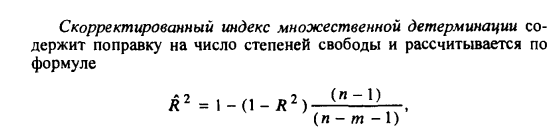

In [90]:
n = 30
m = 3
R_sq = 1 - (1 - R**2) * ((n - 1)/ (n - m - 1))
R_sq

0.3805886858518437

In [91]:
np.sqrt(R_sq)

0.6169187027897952

# Задача № 10

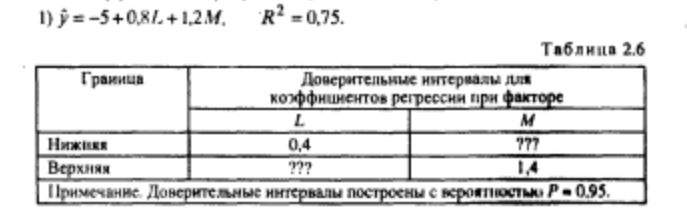

1) Восстановить границы доверительного интервала (проще вставить фото )\
L_верхняя = 1.2\
М_нижняя = 1

Границы доверительного интервала определяются по формуле:\
$b_1 - t_{кр} \cdot \mu_1 \leq B_1 \leq b_1 + t_{кр} \cdot \mu_1$

 mu_i - стандартная ошибка i-го коэффициента\
(1) $ 0.8 - t_{tabl}\cdot \mu_1 = 0.4 => t_{tabl} \cdot \mu_1 = 0.4 => $\
Верхняя  граница доверительного интервала для L равна $ 0.8 + t_{tabl} \cdot \mu_1 = **1.2** $\
(2) $ 1.4 = 1.2 + t_{tabl} \cdot \mu_2 => t_{tabl} \cdot \mu_2 = 0.2 => $\
Нижняя  граница доверительного интервала для М равна $ 1.2 - 0.2 = 1 $


2) Выберите наилучшее уравнение регрессии

Первое уравнение:\
$y = -5 + 0.8 \cdot L + 1.2 \cdot M$

Проверим коэффициенты на значимость с помощью t-статистики Стьюдента

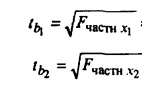

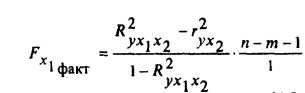

In [29]:
from scipy.stats import *
R_1 = 0.75
n = 20
m = 2
F1 = R_1 / (1 - R_1) * ((n - m - 1)/m)
F = f(1, n - m- 1)
alpha = 0.05
print(F1)
print(F.isf(alpha))

25.5
4.451321772468133


In [31]:
R_2 = 0.77
m = 3
F2 = R_2 / (1 - R_2) * ((n - m - 1)/m)
F_ = f(1, n - m- 1)
alpha = 0.05
print(F2)
print(F_.isf(alpha))

17.855072463768117
4.493998477666352


# Задача № 1

In [18]:
data = pd.read_excel('C:\\Users\\Admin\\Downloads\\data_1.xlsx')
data

,y,x1,x2,x3,x4
0,0.9,31.3,18.9,43.0,40.9
1,1.7,13.4,13.7,64.7,40.5
2,0.7,4.5,18.5,24.0,38.9
3,1.7,10.0,4.8,50.2,38.5
4,2.6,20.0,21.8,106.0,37.3
5,1.3,15.0,5.8,96.6,26.5
6,4.1,137.1,99.0,347.0,37.0
7,1.6,17.9,20.1,85.6,36.8
8,6.9,165.4,60.6,745.0,36.3
9,0.4,2.0,1.4,4.1,35.3


1) Рассчитайте параметры линейного уравнения множественной регрессии с полным перечнем факторов

In [19]:
# Создаём матрицы Х и У для нахождения коэффициентов линейной регрессии
Y = np.array(data['y'])
X = np.hstack((np.array([1] * 25).reshape(25, 1), np.array(data.iloc[:, 1:5])))
B = np.linalg.inv(X.T @ X) @ X.T @ Y
for i in range(0, len(B)):
    print(f'b_{i} = {B[i]:.3f}')

b_0 = -0.363
b_1 = 0.004
b_2 = 0.017
b_3 = 0.005
b_4 = 0.029


Полученное уравнение регрессии имеет вид:\
$y = -0.363 + 0.004x1 + 0.017x2 + 0.005x3 + 0.029x4$

2) Дайте сравнительную оценку силы связи факторов с результатом с помощью средних коэффициентов эластичности

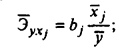

In [20]:
X

array([[  1. ,  31.3,  18.9,  43. ,  40.9],
       [  1. ,  13.4,  13.7,  64.7,  40.5],
       [  1. ,   4.5,  18.5,  24. ,  38.9],
       [  1. ,  10. ,   4.8,  50.2,  38.5],
       [  1. ,  20. ,  21.8, 106. ,  37.3],
       [  1. ,  15. ,   5.8,  96.6,  26.5],
       [  1. , 137.1,  99. , 347. ,  37. ],
       [  1. ,  17.9,  20.1,  85.6,  36.8],
       [  1. , 165.4,  60.6, 745. ,  36.3],
       [  1. ,   2. ,   1.4,   4.1,  35.3],
       [  1. ,   6.8,   8. ,  26.8,  35.3],
       [  1. ,  27.1,  18.9,  42.7,  35. ],
       [  1. ,  13.4,  13.2,  61.8,  26.2],
       [  1. ,   9.8,  12.6, 212. ,  33.1],
       [  1. ,  19.5,  12.2, 105. ,  32.7],
       [  1. ,   6.8,   3.2,  33.5,  32.1],
       [  1. ,  27. ,  13. , 142. ,  30.5],
       [  1. ,  12.4,   6.9,  96. ,  29.8],
       [  1. ,  17.7,  15. , 140. ,  25.4],
       [  1. ,  12.7,  11.9,  59.3,  29.3],
       [  1. ,  21.4,   1.6, 131. ,  29.2],
       [  1. ,  13.5,   8.6,  70.7,  29.2],
       [  1. ,  13.4,  11.5,  65

In [21]:
for i in range(1, len(B)):
    el = B[i] * X[:, i].mean()/data['y'].mean()
    print(f" эластичность b{i} : {el: .3f}")

 эластичность b1 :  0.057
 эластичность b2 :  0.183
 эластичность b3 :  0.391
 эластичность b4 :  0.602


Вывод по эластичности:\
С увеличением оборотного капитала на 1% чистый доход компании увеличивается на 0.057 млрд долларов\
С увеличением использованного капитала на 1% чистый доход компании увеличивается на 0.183 млрд долларов\
С увеличением численности служащих на 1% чистый доход компании увеличивается на 0.391 млрд долларов\
С увеличением рыночной капитализации компании на 1% чистый доход компании увеличивается на 0.602 млрд долларов\

3) Оцените статистическую значимость парметров регрессионой модели с помощью t-критерия; нулевую гипотезу о значимости уравнения и показателей тесноты связи проверьте с помощью F-критерия

In [22]:
n = 25
m = 4
from scipy.stats import *
T = t(n-m-1)
alpha = 0.05
round(T.isf(alpha/2), 3)

2.086

$t_{\alpha} = 2.086$

In [23]:
Z_jj = np.diag(np.linalg.inv(X.T @ X))
Y_cap = -0.363 + 0.004 * data['x1'] + 0.017 * data['x2'] + 0.005 * data['x3'] + 0.029 * data['x4']
e = Y - Y_cap
S = ( np.sum(e**2) / (n - m - 1) ) ** 0.5
S

0.7795991142888761

In [24]:
# Проверим на значимость коэффициенты b0 - b4:
for i in range(len(B)):
    S_bj = Z_jj[i]**0.5 * S
    print(f't_nabl_b{i} = {B[i] / S_bj:.3f} {B[i] / S_bj > 2.086}')

t_nabl_b0 = -0.304 False
t_nabl_b1 = 0.179 False
t_nabl_b2 = 0.801 False
t_nabl_b3 = 1.656 False
t_nabl_b4 = 0.781 False


Видим, что все коэффициенты уравнения оказались незначимы

In [25]:
R_matr = np.array([[1, 0.9, 0.91, 0.25, 0.85], 
                   [0.9, 1, 0.71, 0.35, 0.76], 
                   [0.91, 0.71, 1, 0.12, 0.83], 
                   [0.25, 0.35, 0.12, 1, 0.27],
                  [0.85, 0.76, 0.83, 0.27, 1]])
r_phi = R_matr[0:4, 0:4]
R = np.sqrt(1 - np.linalg.det(R_matr)/ np.linalg.det(r_phi))
R

0.8696013540227129

In [26]:
# коэф детерминации
R_det = R**2
R_det

0.7562065149181356

In [27]:
# проверка на значимость
F = R_det/(1 - R_det) * ((n - m - 1)/m)
F

15.509161671490237

In [28]:
F = f(m, n - m -1)
alpha = 0.05
F.isf(alpha)

2.8660814020156584

# Вопрос:
Почему при всех незначимых параметрах регрессии мы в итоге получаем значимое уравнение

4) Оцените качество уравнения через среднюю ошибку аппроксимации

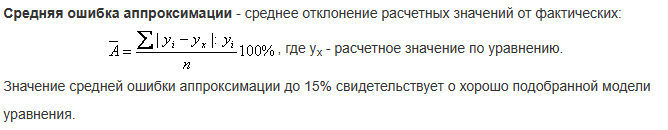

In [29]:
A = sum(abs(data['y'] - Y_cap)/data['y'])/n * 100
A

29.1724613286715

Получем среднюю ошибку аппроксимации А ~= 29%. Видим, что полученное значение сильно превосходит допустимую норму (5 - 7%)\
Следовательно, можно сделать вывод о некачественно подобранной модели регрессии

Рассчитайте матрицы парных и частных коэффициентов корреляции и на их основе и по t-критерию для коэффициентов регрессии отберите информативные факторы в модель. Посторойте модель только с информативными факторами и оцените ее.

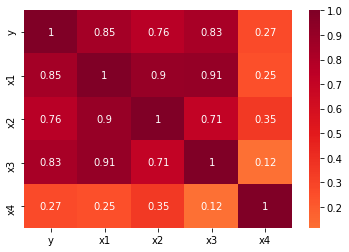

In [30]:
import seaborn as sns
sns.heatmap(data.corr(), cmap='YlOrRd', center=0.0, annot = True)

In [31]:
# видим сильную межфакторную корреляцию между:
# x1 и x2, x1 и x3, x2 и x3

In [32]:
R_matr = np.array([[1, 0.9, 0.91, 0.25, 0.85], 
                   [0.9, 1, 0.71, 0.35, 0.76], 
                   [0.91, 0.71, 1, 0.12, 0.83], 
                   [0.25, 0.35, 0.12, 1, 0.27],
                  [0.85, 0.76, 0.83, 0.27, 1]])
R_matr

array([[1.  , 0.9 , 0.91, 0.25, 0.85],
       [0.9 , 1.  , 0.71, 0.35, 0.76],
       [0.91, 0.71, 1.  , 0.12, 0.83],
       [0.25, 0.35, 0.12, 1.  , 0.27],
       [0.85, 0.76, 0.83, 0.27, 1.  ]])

In [82]:
#t_nabl = R_matr/np.sqrt(1 - R_matr**2) * np.sqrt(n - 2)
#t_nabl

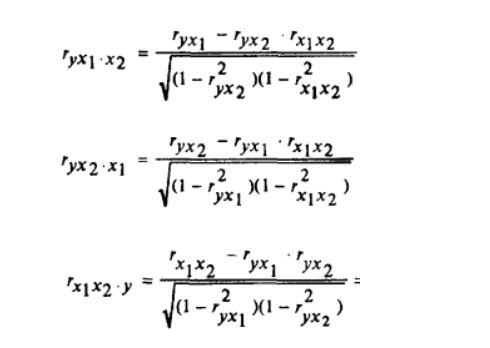

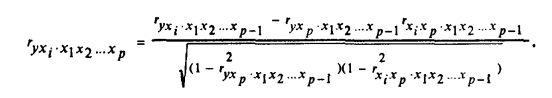

In [101]:
R_matr

array([[1.  , 0.9 , 0.91, 0.25, 0.85],
       [0.9 , 1.  , 0.71, 0.35, 0.76],
       [0.91, 0.71, 1.  , 0.12, 0.83],
       [0.25, 0.35, 0.12, 1.  , 0.27],
       [0.85, 0.76, 0.83, 0.27, 1.  ]])

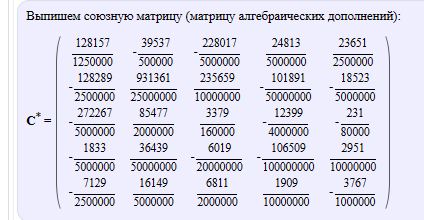

In [92]:
C = np.array([[128157/1250000, -39537/500000, -228017/5000000, 24813/5000000, 23651/2500000], 
             [-128289/2500000, 931361/25000000, 235659/10000000, -101891/50000000, -18523/5000000],
             [-272267/5000000, 85477/2000000, 3379/160000, -12399/4000000, -231/80000],
             [-1833/5000000, 26439/50000000, -6019/20000000, -106509/100000000, 2951/10000000],
             [-7129/2500000, 16149/5000000, 6811/2000000, 1909/10000000,-3767/1000000]])
C

array([[ 0.1025256 , -0.079074  , -0.0456034 ,  0.0049626 ,  0.0094604 ],
       [-0.0513156 ,  0.03725444,  0.0235659 , -0.00203782, -0.0037046 ],
       [-0.0544534 ,  0.0427385 ,  0.02111875, -0.00309975, -0.0028875 ],
       [-0.0003666 ,  0.00052878, -0.00030095, -0.00106509,  0.0002951 ],
       [-0.0028516 ,  0.0032298 ,  0.0034055 ,  0.0001909 , -0.003767  ]])

In [98]:
corr = []
for i in range(len(C)):
    for j in range(len(C[i])):
        corr.append(-C[i][j]/np.sqrt(C[i][i] * C[j][j]))
corr = np.array(corr)
corr = corr.reshape(5,5)
corr

array([[-1.        ,  1.27946535,  0.98004712,         nan,         nan],
       [ 0.83031758, -1.        , -0.84015788,         nan,         nan],
       [ 1.17023946, -1.52368836, -1.        ,         nan,         nan],
       [        nan,         nan,         nan,  1.        , -0.14732561],
       [        nan,         nan,         nan, -0.09530484,  1.        ]])

## Попыталась составить матрицу частных коэф-ов корреляции
## Но не вышло :(

# Модели нелинейной регрессии

In [90]:
nel_1 = pd.read_excel('C:\\Users\\Admin\\Downloads\\nelin_1.xlsx')
nel_1

,t,w_t,u_t
0,1,1.73,8.65
1,2,1.94,4.82
2,3,3.05,2.67
3,4,4.17,2.67
4,5,2.52,2.58
5,6,1.71,8.07
6,7,1.95,8.83
7,8,2.57,5.54
8,9,5.06,2.87
9,10,2.81,5.29


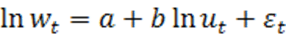

1) Оценить качество спецификации модели

In [110]:
ln_w_t = np.log(np.array(nel_1['w_t']))
ln_u_t = np.log(np.array(nel_1['u_t']))
w_t, u_t = np.array(nel_1['w_t']), np.array(nel_1['u_t'])

In [111]:
rho = np.corrcoef(ln_w_t, ln_u_t)[0][1]
b = rho * ln_w_t.var()**0.5 / ln_u_t.var()**0.5
a = ln_w_t.mean() - b*ln_u_t.mean()
print(f'a = {a:.3f}, b = {b:.3f}')

a = 2.300, b = -0.779


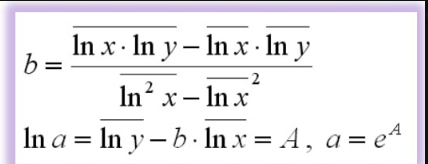

$\Large \ln(w_t) = 2.300 -0.779\ln(u_t)$

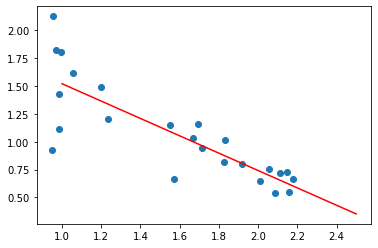

In [151]:
plt.scatter(ln_u_t, ln_w_t)
l = np.linspace(1, 2.5)
y = 2.300 - 0.779 * l
plt.plot(l, y, 'r')

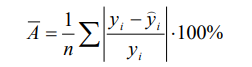

In [112]:
w_t_cap = np.exp(2.300) * u_t**(-0.799)
A = 100 / w_t.size * sum( abs( (w_t - w_t_cap)/w_t ) )
print(f'A = {A:.3f}%')

A = 18.486%


In [120]:
R = (np.corrcoef(ln_w_t, ln_u_t)[0][1])**2
print(f'Коэффициент детерминации R^2 = {R:.3f}')

Коэффициент детерминации R^2 = 0.682


Так как ошибка аппроксимации составляет 18.486% (допустимая норма 5-7%), можем сделать вывод о том, что наша модель достаточно плохо описывает зависимость исходных данных.

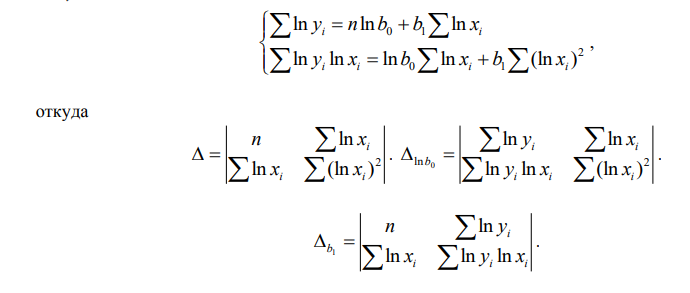

In [93]:
y = np.array(nel_1['w_t'])
x = np.array(nel_1['u_t'])
n = 24
ln_y = np.log(y)
ln_x = np.log(x)
ln_x_2 = np.log(x**2)
delta = np.linalg.det(np.array([[n, sum(np.log(x))], [sum(np.log(x)), sum(np.log(x)**2)]]))
delta_ln_b0 = np.linalg.det(np.array([[sum(np.log(y)), sum(np.log(x))], [sum(np.log(y)*np.log(x)), sum(np.log(x)**2)]]))
delta_ln_b1 = np.linalg.det(np.array([[n, sum(np.log(y))], [sum(np.log(x)), sum(np.log(y)*np.log(x))]]))
print(f"ln_b0: {delta_ln_b0/delta:.3f}")
print(f"ln_b1: {delta_ln_b1/delta:.3f}")

ln_b0: 2.300
ln_b1: -0.779


In [124]:

# Проверим на значимость степенное уравнение:
# F_tabl = F_tabl(0.05, 1, 25-1-1) = F_tabl(0.05, 1, 23) = 4.28
from scipy.stats import *
R = rho**2
n, m = w_t.size, 1
F_nabl = R**2 / (1 - R**2) * (n - m - 1) / m
F = f(1, n - m -1)
print(F.isf(0.05))
print(f'F_nabl = {F_nabl:.3f}, {F_nabl > 4.28}')

4.300949501777657
F_nabl = 19.168, True


# Задача № 2

In [136]:
nel_2 = pd.read_excel('C:\\Users\\Admin\\Downloads\\nelin_2.xlsx')
nel_2

,t,K,I
0,1994,35.474,37.759
1,1995,37.096,40.131
2,1996,40.319,43.412
3,1997,41.816,47.094
4,1998,45.239,48.579
5,1999,51.176,54.564
6,2000,54.609,58.884
7,2001,56.980,63.251
8,2002,62.604,66.325
9,2003,66.280,71.378


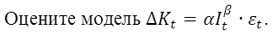

Линеаризуем исходную модель:\
$\Large \ln(\Delta K) = \ln(\alpha) + \beta \cdot \ln(I) + \ln(\epsilon)$

In [142]:
K, I = np.array(nel_2['K']), np.array(nel_2['I'])

In [143]:
ln_K, ln_I = np.log(K), np.log(I)
rho = np.corrcoef(ln_K, ln_I)[0][1]
beta = rho * ln_K.var()**0.5 / ln_I.var()**0.5
ln_a = ln_K.mean() - beta*ln_I.mean()
print(f'ln(a) = {ln_a:.3f}, beta = {beta:.3f}\nКоэффициент детерминации R^2 = {rho**2:.3f}')

ln(a) = 0.036, beta = 0.973
Коэффициент детерминации R^2 = 0.982


In [139]:
np.exp(0.973)

2.6458701753619405

Модель нелинейной ререссии имеет вид:

$\Large K = e^{0.036}\cdot I^{0.973} $

In [144]:
K_cap = np.exp(0.036) * I**(0.973)
A = 100 / K_cap.size * sum( abs( (K - K_cap)/K ) )
print(f'A = {A:.3f}%')


A = 3.634%


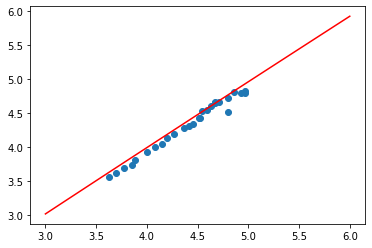

In [147]:
import matplotlib.pyplot as plt
plt.scatter(ln_I, ln_K)
l = np.linspace(3, 6)
y = np.exp(0.036) * l**(0.973)
plt.plot(l, y, 'r')

Так как ошибка аппроксимации составляет 0.79% (допустимая норма 5-7%) !!!, можем сделать вывод о том, что наша модель очень хорошо описывает зависимость исходных данных.

In [152]:

# Проверим на значимость степенное уравнение:
# F_tabl = F_tabl(0.05, 1, 27-1-1) = F_tabl(0.05, 1, 25) = 4.24
R = rho**2
n, m = K.size, 1
F_nabl = R**2 / (1 - R**2) * (n - m - 1) / m
print(f'F_nabl = {F_nabl:.3f}, {F_nabl > 4.24}')

F_nabl = 673.476, True


# Задача 3

In [82]:
nel_3 = pd.read_excel('C:\\Users\\Admin\\Downloads\\data4.xlsx')
nel_3

,Q,L,K
0,2350,2334,1570
1,2470,2425,1850
2,2110,2230,1150
3,2560,2463,1940
4,2650,2565,2450
5,2240,2278,1340
6,2430,2380,1700
7,2530,2437,1860
8,2550,2446,2446
9,2450,2403,2403


In [153]:
Q, L, K = np.array(nel_3['Q']), np.array(nel_3['L']), np.array(nel_3['K'])

$\Large \ln(y) = \ln(\alpha) + \beta_1 \cdot \ln(x_1) + \beta_2 \cdot \ln(x_2)$

In [156]:
ln_Q, ln_L, ln_K = np.log(Q), np.log(L), np.log(K)
matrix_X = np.array([[1]*ln_L.size, ln_L, ln_K]).T
B = np.linalg.inv((matrix_X.T @ matrix_X)) @ matrix_X.T @ ln_Q
print(f'ln(alpha) = {B[0]:.3f}\n beta_1 = {B[1]:.3f}\n beta2 = {B[2]:.3f}')

ln(alpha) = -5.342
 beta_1 = 1.681
 beta2 = 0.008


$\Large Q = -5.342 + \ln(L)^{1.681} + \ln(K)^{0.008}$

$\Large Q = e^{-5.342} \cdot  L^{1.681} \cdot K^{0.008}$

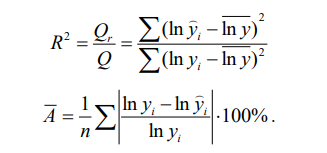

In [157]:

# Найдем ошибку средней аппроксимации:
Q_cap = np.exp(-5.342) * L**1.681 * K**0.008
A = 100 / Q.size * sum( abs( (Q - Q_cap)/Q ) )
print(f'A = {A:.3f}%')

A = 0.929%


Так как ошибка аппроксимации составляет 0.06% (допустимая норма 5-7%) !!!, можем сделать вывод о том, что наша модель очень хорошо описывает зависимость исходных данных.

Оценка парметров модели:\
Если L изменится на 1% (при неизменном K), то Q изменится на $\beta_1$ (= 1.681)%\
Если K изменится на 1% (при неизменном L), то Q изменится на $\beta_2$ (= 0.008)%

In [158]:
# Найдем коэффициент множественной детерминации и проверим качество спецификации модели:
r_X1_Y = np.corrcoef(L, Q)[0][1]
r_X2_Y = np.corrcoef(K, Q)[0][1]
r_X1_X2 = np.corrcoef(L, K)[0][1]
matrix_rho_X1_X2_Y = np.array([[1, r_X1_X2, r_X1_Y],
                        [r_X1_X2, 1, r_X2_Y],
                        [r_X1_Y, r_X2_Y, 1]])

R_X1_X2_Y = ( 1 - np.linalg.det(matrix_rho_X1_X2_Y)/np.linalg.det(matrix_rho_X1_X2_Y[:2, :2]) ) ** 0.5

print(f'Коэффициент множественной корреляции = {R_X1_X2_Y:.3f}\nКоэффициент детерминации R^2 = {R_X1_X2_Y**2:.3f}')
# F_tabl = F_tabl(0.05, 2, 15-2-1) = F_tabl(0.05, 2, 12) = 3.89
R = R_X1_X2_Y**2
n, m = Q.size, 2
F_nabl = R**2 / (1 - R**2) * (n - m - 1) / m
print(f'F_nabl = {F_nabl:.3f}, {F_nabl > 3.89}')

Коэффициент множественной корреляции = 0.983
Коэффициент детерминации R^2 = 0.966
F_nabl = 83.630, True
